# Assignment 2: Supervised Classification

Authors: \\
Eduardo Angulo Martinez - A00820188 \\
Carlos Javier García Treviño - A01196981 \\
Pablo César Ruiz Hernádez - A01197044

# Summary

During last sessions of Machine Learning (CS4013) course we have studied a wide variety of ways to apply classifiers to datasets in order to find relationships between the different variables included within each database. Some examples of the studied classifiers are decision trees, kNN, Fisher, Random Forest, Support Vector Machine, to mention a few. \\
 \\
For this particular activity, we are going to work with a randomly assigned dataset retrieved from the UCI ML repository [1]. Then, we are going to apply three of the previously mentioned classifiers (we are going to select them depending on the situation) and try to find a relationship between the attributes of the dataset.

# Description of work done
The information used in this homework is dataset: 3 - Census Income, based on the sum of the rightmost digit of the teammates' id and taking the rightmost digit of the sum. In this case (8+1+4) = 13, so digit taken was '3'.

From what we have learned during this semester, we have identified some Python libraries that are really usefull for machine learning topics: Scikit-learn and pandas. The first one of them is a very powerful tool [2], since it features most of the classifiers mentioned on the Summary section. On the other hand, pandas is a library commonly used for dataframe manipulation [3]; it works perfectly well on Python and it's open-source, so we will use it on our assignment. \\
 \\
As the first step, we import every usefull extension of this libraries:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn import preprocessing
from plotly.offline import iplot

c:\Users\pcruiher08\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\pcruiher08\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\pcruiher08\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


## Data preprocessing
The second activity of the assignment was to clean the input dataset. As we can observe, the dataset contains 15 attributes (or columns) of information; some of them contain null values -which are represented by a question mark, '?'- so we drop these observations in order to make the dataset tidy.

In [2]:
def importdata():
  columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status',
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
            'hours-per-week', 'native-country', 'income']
  data = pd.read_csv(
  'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
  sep= ', ', names=columns)
  data.drop(data.index[data['native-country'] == '?'], inplace=True)
  data.drop(data.index[data['occupation'] == '?'], inplace=True)
  data = data.reset_index()
  return data

In [3]:
dataset = importdata()

c:\Users\pcruiher08\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



## Data visualization
With the tidy dataset, we were able to represent the observations on different kind of graphs and plot in an easier way. We decided to invest time on this stage, since with these graphs we were able to decide which attributes were we going to study on the classification section.

<AxesSubplot:>

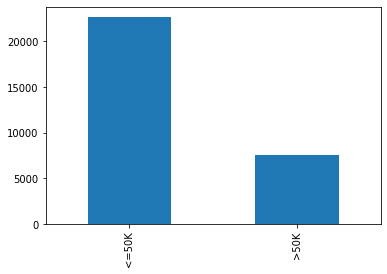

In [4]:
dataset['income'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Farming-fishing'),
  Text(8, 0, 'Machine-op-inspct'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Craft-repair'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

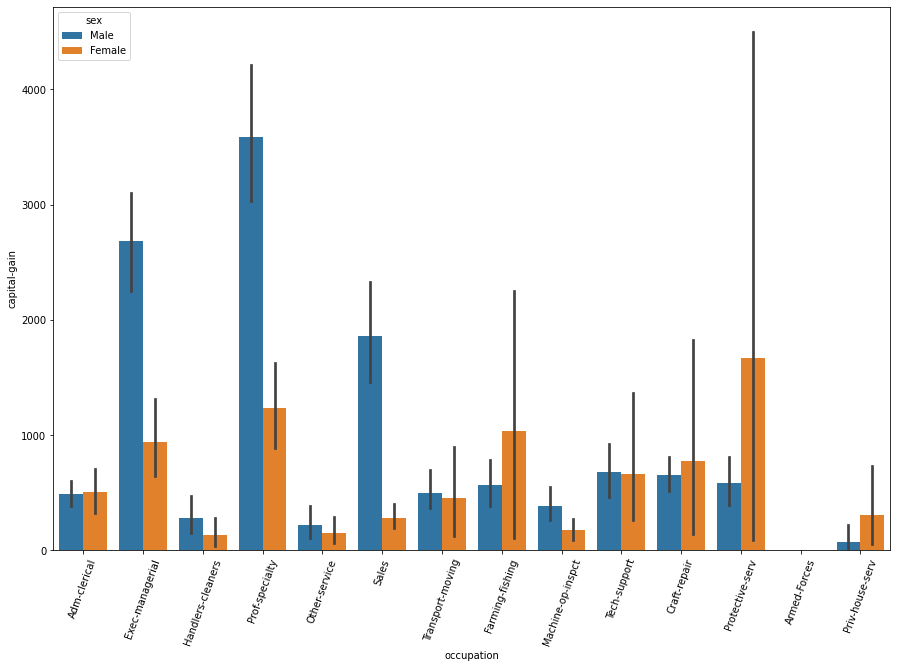

In [5]:
plt.figure(figsize=(15,10))
sns.barplot(x='occupation',y='capital-gain',data=dataset,hue='sex')
plt.xticks(rotation=70)

<AxesSubplot:xlabel='education', ylabel='hours-per-week'>

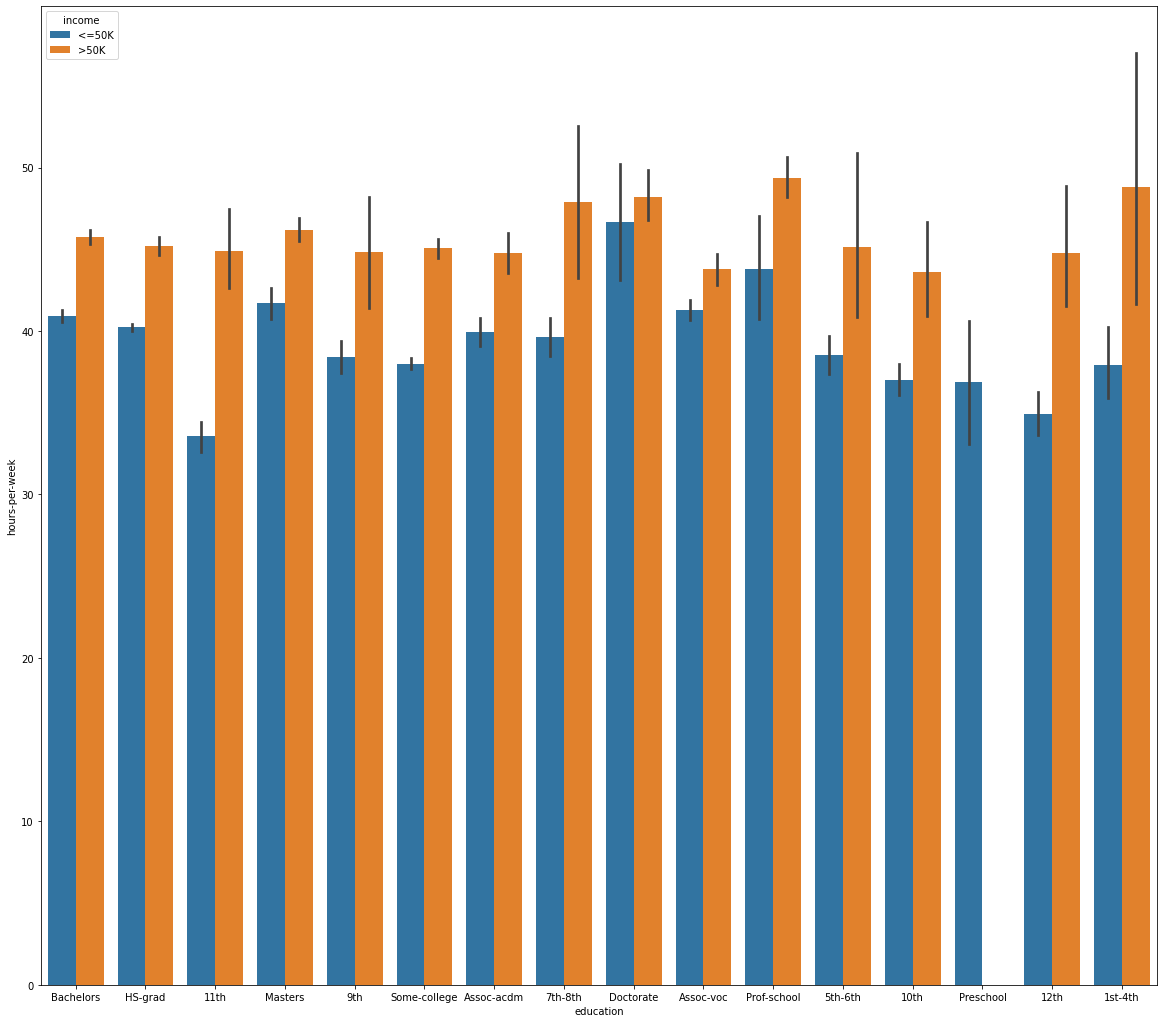

In [6]:
plt.figure(figsize=(20,18))
sns.barplot(x='education',y='hours-per-week', data=dataset, hue='income')
##Checking the distribution of Education and  Hours_per_week as gender

From the previous plots, we decided to work with the following attributes -since they are the most important ones for us- : age, fnlwgt, education-num, and hours-per-week.

## Encoding categorical values
In the fourth step, and with our attributes already selected, we needed to filter a little bit more our dataset by creating a one-hot numeric array to standarize the features. \\
To do so, we implemented the following two python functions. The "onehotencoder" function is in charge of converting the input dataset with integers and/or string values into an output array with encoded information [4]. The reason to do this was that, according to Scikit-learn documentation, many classifiers from sklearn library require encoded categorical data in order to properly work, so this was a necessary step. \\
On the other hand, with "standarscaler" function we were able to use these sklearn libraries to standarize the features of our dataset [5].

In [7]:
def standarscaler(data):
  scaler = preprocessing.StandardScaler()
  train_col_scale = data[['age', 'fnlwgt', 'education-num', 'hours-per-week']]
  train_scaler_col = scaler.fit_transform(train_col_scale)
  train_scaler_col = pd.DataFrame(train_scaler_col, columns=train_col_scale.columns)
  data['age'] = train_scaler_col['age']
  data['fnlwgt'] = train_scaler_col['fnlwgt']
  data['education-num'] = train_scaler_col['education-num']
  data['hours-per-week'] = train_scaler_col['hours-per-week']
  return data

In [8]:
def onehotencoder(dataset):
  le = preprocessing.LabelEncoder() # label encoder 
  dataset['income'] = le.fit_transform(dataset['income']) 
  dataset['sex'] = le.fit_transform(dataset['sex'])
  dataset = pd.get_dummies(dataset,drop_first=True)
  return dataset

In [9]:
dataset = onehotencoder(dataset)
dataset = standarscaler(dataset)

## Data Spliting
Then, we finally arrived to the step before the classification begins: data splitting. Here we divided our dataset into two: the train section and the test section. To do so, we used the sklearn function known as "train_test_split"; this function received four parameters, which were ... \\
1. X-dataset: this portion represented the "sex" column of our standarized dataframe.
2. Y-dataset: this portion represented the "income" column of our standarized dataframe.
3. test_size: this parameter represent the proportion of information that will be treated as data for the TEST SECTION. In our case, we decided to use 30% of the information for the TEST SECTION.
4. random_state: this parameter controls the suffling applied to the dataframe [6]. We decided to go with a value of 100.

In [10]:
# Function to split the dataset
def splitdataset(data):
  X = data.drop(['income'],axis=1)
  Y = data['income']
  # Splitting the dataset into train and test
  X_train, X_test, y_train, y_test = train_test_split( 
  X, Y, test_size = 0.3, random_state = 100)
  return X, Y, X_train, X_test, y_train, y_test

In [11]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(dataset)

# Decision Tree Model

For the Decision Tree Model we organized the structure of the code with three different main functions. 

One for calculating accuracy of the predictions using a confusion matrix and a general accuracy percentage calculation. 

One for launching the prediction in the three given the test data.

And one for training with entropy using the train data.


For the call of the first tree (the Decision Tree), a depth of 3 and an amount of 5 leaves were chosen for the first three, 8 and 10 for the second one, and 13 and 15 for the third one. This two parameters have a default value of 0 and 1. For the case of the depth, if it was 0, nodes would be expanded until all leaves are pure or until all leaves contain less than the minimum amount of samples when splitting. As for the amount of leaves, 5 was chosen to be the minimum number of samples needed to be at a leaf node.

In general, the model has a default setting called gini which measures the quality of the split based on Gini impurity when training. We chose to train with entropy to take into account the information gain instead (and it was part of the assignment).


After that, the prediction is done utilizing the test part of the dataset and the trainging previously done.

Then, we call the accuracy function to display the results. 



In [18]:
# Function to calculate accuracy
def accuracy_tree(y_test_tree, y_pred_tree, clf_entropy):
  cross_val_score(clf_entropy, X_train, y_train, cv=10)
  print("Confusion Matrix: ", '\n',
        confusion_matrix(y_test_tree, y_pred_tree))
  print("Accuracy: ",
        accuracy_score(y_test_tree,y_pred_tree)*100)
  print("Report: ", '\n',
        classification_report(y_test, y_pred_tree))

In [19]:
# Function to make predictions
def prediction_tree(X_test_tree, clf_object_tree):
  # Prediction on test with giniIndex
  y_pred_tree = clf_object_tree.predict(X_test_tree)
  print("Predicted values:")
  print(y_pred_tree)
  return y_pred_tree

In [20]:
# Function to perform training with entropy.
def train_tree(X_train_tree, y_train_tree, depth, leaf):
  # Decision tree with entropy
  clf_entropy = DecisionTreeClassifier(
    criterion = "entropy", random_state = 100,
    max_depth = depth, min_samples_leaf = leaf)
  # Performing training
  clf_entropy.fit(X_train_tree, y_train_tree)
  return clf_entropy

In [21]:
# Tree Number One
clf_entropy_1 = train_tree(X_train, y_train, 3, 5)
print("Results Using Entropy with depth of 3 and min leaf of 5:")
y_pred_entropy = prediction_tree(X_test, clf_entropy_1)
accuracy_tree(y_test, y_pred_entropy, clf_entropy_1)

Results Using Entropy with depth of 3 and min leaf of 5:
Predicted values:
[0 0 0 ... 0 1 1]
Confusion Matrix:  
 [[6411  340]
 [1119 1179]]
Accuracy:  83.87667145540944
Report:  
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      6751
           1       0.78      0.51      0.62      2298

    accuracy                           0.84      9049
   macro avg       0.81      0.73      0.76      9049
weighted avg       0.83      0.84      0.83      9049



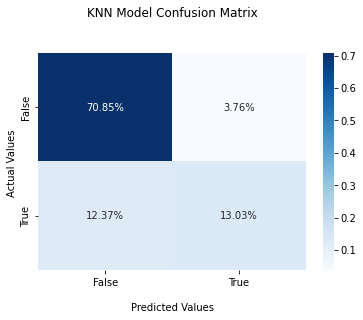

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred_entropy)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('KNN Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
columns = dataset.columns.values.tolist()
dot_data = tree.export_graphviz(clf_entropy_1, out_file=None, 
                              feature_names=columns[:97],  
                              class_names=columns[97],
                              filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
#graph

In [27]:
# Tree Number Two
clf_entropy_2 = train_tree(X_train, y_train, 8, 10)
print("Results Using Entropy with depth of 8 and min leaf of 10:")
y_pred_entropy = prediction_tree(X_test, clf_entropy_2)
accuracy_tree(y_test, y_pred_entropy, clf_entropy_2)

Results Using Entropy with depth of 8 and min leaf of 10:
Predicted values:
[0 0 0 ... 0 1 1]
Confusion Matrix:  
 [[6420  331]
 [1051 1247]]
Accuracy:  84.7275942093049
Report:  
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      6751
           1       0.79      0.54      0.64      2298

    accuracy                           0.85      9049
   macro avg       0.82      0.75      0.77      9049
weighted avg       0.84      0.85      0.84      9049



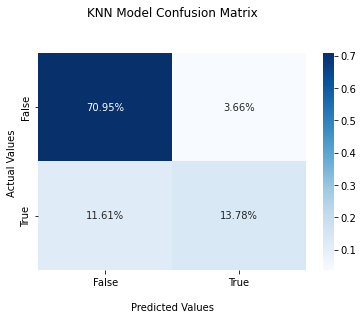

In [28]:
cf_matrix = confusion_matrix(y_test, y_pred_entropy)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('KNN Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
columns = dataset.columns.values.tolist()
dot_data = tree.export_graphviz(clf_entropy_2, out_file=None, 
                              feature_names=columns[:97],  
                              class_names=columns[97],
                              filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
#graph

In [32]:
# Tree Number Three
clf_entropy_3 = train_tree(X_train, y_train, 13, 15)
print("Results Using Entropy with depth of 13 and min leaf of 15:")
y_pred_entropy = prediction_tree(X_test, clf_entropy_3)
accuracy_tree(y_test, y_pred_entropy, clf_entropy_3)

Results Using Entropy with depth of 13 and min leaf of 15:
Predicted values:
[0 0 0 ... 0 1 1]
Confusion Matrix:  
 [[6247  504]
 [ 914 1384]]
Accuracy:  84.32976019449663
Report:  
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6751
           1       0.73      0.60      0.66      2298

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.84      0.84      9049



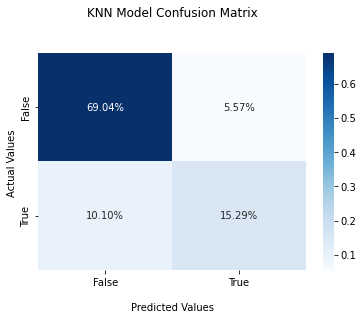

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred_entropy)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('KNN Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [35]:
columns = dataset.columns.values.tolist()
dot_data = tree.export_graphviz(clf_entropy_3, out_file=None, 
                              feature_names=columns[:97],  
                              class_names=columns[97],
                              filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
#graph

# KNN Model
From what we can observe below, we implemented this model with three similar functions related to the decision tree's section. The main difference consist on the Scikit-learn function that is called -in this case, we are using the KNeighborsClassifier-. \\
The k-Nearest Neighbors Model consists of an algotihm that uses information from the attributes that are in the near proximity between one another [7]. \\
One of its main advantages is that this model can be represented in a simple and effective way, considering not huge datasets, but tidy ones [8]. And this was the main reason why we selected KNN Model for our homework.

In [36]:
# Function to make predictions
def prediction_knn(X_test_knn, clf_object_knn):
  # Prediction on test with giniIndex
  y_pred_knn = clf_object_knn.predict(X_test_knn)
  print("Predicted values:")
  print(y_pred_knn)
  return y_pred_knn

In [37]:
# Function to calculate accuracy
def accuracy_knn(y_test_knn, y_pred_knn):
  print("Confusion Matrix: ", '\n',
        confusion_matrix(y_test_knn, y_pred_knn))
  print("Accuracy: ",
        accuracy_score(y_test_knn,y_pred_knn)*100)
  print("Report: ", '\n',
        classification_report(y_test_knn, y_pred_knn))

In [38]:
# Function to perform training for KNN Model.
def train_knn(X_train, y_train):
  knn = KNeighborsClassifier()
  # Performing training
  knn.fit(X_train, y_train)
  return knn

In [41]:
clf_knn = train_knn(X_train, y_train)
print("Results Using KNN:")
y_pred_knn = prediction_knn(X_test, clf_knn)
accuracy_knn(y_test, y_pred_knn)

Results Using KNN:
Predicted values:
[0 0 0 ... 0 0 1]


NameError: name 'y_pred_svm' is not defined

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('KNN Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

For a better representation of the results, we decided to create the previous Confusion Matrix for the Model. In addition, we also analyzed the accuracy results printed over the Confusion Matrix. \\
From the image, we can observe that with this model and the proportion of 30% for testing and 70% for training, it can predict really well actual false values (with 69.22%). It has some space for improvements on the prediction of actual true values (7.69%), but overall it has a good accuracy with a percentage of 76.91 -which can be observed from the accuracy results printed over, or by adding "69.22" + "7.69"-.

# SVM Model
Once again for this last model, the skeleton is the same as the other ones. The only difference is the use of Scikit-learn function for Support Vector Machine -which has the name of "SVC"-. This model is characterized for locating a "hyperplane" on the center of the input dataset with one small margin within values [9]. \\
The main reason why we decided to imlement this model is because the hyperplane helps to classify the data points in an easier way, and since we are trying to do the same with our dataset, we used the Support Vector Machine algorithm.

In [ ]:
# Function to make predictions
def prediction_svm(X_test_svm, clf_object_svm):
  # Prediction on test with giniIndex
  y_pred_svm = clf_object_svm.predict(X_test_svm)
  print("Predicted values:")
  print(y_pred_svm)
  return y_pred_svm

In [ ]:
# Function to calculate accuracy
def accuracy_svm(y_test_svm, y_pred_svm):
  print("Confusion Matrix: ", '\n',
        confusion_matrix(y_test_svm, y_pred_svm))
  print("Accuracy: ",
        accuracy_score(y_test_svm,y_pred_svm)*100)
  print("Report: ", '\n',
        classification_report(y_test_svm, y_pred_svm))

In [ ]:
# Function to perform training for KNN Model.
def train_svm(X_train, y_train):
  svm = SVC()
  # Performing training
  svm.fit(X_train, y_train)
  return svm

In [ ]:
clf_svm = train_svm(X_train, y_train)
print("Results Using SVM:")
y_pred_svm = prediction_svm(X_test, clf_svm)
accuracy_svm(y_test, y_pred_svm)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('SVM Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# Results
For a better comparison of the three decision trees, the Support Vector Machine Model and the KNN one, we decided to create the next plot.

In [ ]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(clf_entropy_1,X_test,y_test)
plot_roc_curve(clf_entropy_2,X_test,y_test,ax=disp.ax_)
plot_roc_curve(clf_entropy_3,X_test,y_test,ax=disp.ax_)
plot_roc_curve(clf_svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

As per above, we can see that the second decision tree classifier is giving the best score.

# Discussion & Conclusions
As a matter of conclusion, we would like to mention that this activity was quite educative. We explored how to tackle a dataset with three different methods, in this case the Decision Tree, the KNN and the SVM. In these three we obtained that the second decision tree (the one with 8 as depth and 10 as leaves) returned the best results.

# References

[1] Machine Learning Repository: Center for Machine Learning and Intelligent Systems. (n.a). Recovered from https://archive.ics.uci.edu/ml/datasets.php on March 29th, 2022. \\
[2] Scikit-learn: Machine Learning in Python. (2022). Recovered from https://scikit-learn.org/stable/ on March 29th, 2022. \\
[3] Pandas. (2022). Recovered from https://pandas.pydata.org/ on March 29th, 2022. \\
[4] Scikit-learn: OneHotEncoder. (2022). Recovered from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html on March 29th, 2022. \\
[5] Scikit-learn: StandardScaler. (2022). Recovered from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html on March 29th, 2022. \\
[6] Scikit-learn: train_test_split. (2022). Recovered from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html on March 29th, 2022. \\
[7] Machine Learning Basics with the K-Nearest Neighbors Algorithm. (2018). Retrieved from https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d0176 on March 29th, 2022. \\
[8] González, M. (2022). Machine Learning 4 - KNN Model. Canvas. Retrieved from https://experiencia21.tec.mx/ on March 29th, 2022. \\
[9] Support Vector Machine - Introduction to Machine Learning Algorithms. (2022). Retrieved from https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 on March 29th, 2022. \\